In [70]:
import os
import sys

import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt

In [71]:
# Tadpose library
import tadpose

### Load a SLEAP predicted movie 

In [72]:
# main input required. SLEAP naysis file is expected to be in same folder with ending ".predictions.analysis.h5"
video_fn = "../demo/test_movie.mp4"

# create tad object
tad = tadpose.Tadpole.from_sleap(video_fn)

# list of body part names
print("Bodyparts:\n-", "\n -".join(tad.bodyparts))

Bodyparts:
- Right_Eye
 -Left_Eye
 -Heart_Center
 -Tail_Stem
 -Right_Hand
 -Right_Wrist
 -Right_Elbow
 -Right_Shoulder
 -Left_Hand
 -Left_Wrist
 -Left_Shoulder
 -Right_Hip
 -Right_Knee
 -Right_Ankle
 -Right_Foot
 -Left_Hip
 -Left_Knee
 -Left_Ankle
 -Left_Foot
 -Left_Elbow
 -Left_toe
 -Right_toe
 -Tail_1
 -Tail_2
 -Tail_3
 -Tail_4
 -Tail_5
 -Tail_6
 -Tail_7
 -Tail_8
 -Tail_9
 -Tail_10
 -Tail_Tip


### Setup aligner

In [73]:
# create aligner by giving to part names and their correpsonding alignment location
aligner = tadpose.alignment.RotationalAligner(
    central_part="Tail_Stem", aligned_part="Heart_Center", align_to=(0, 1)
)

# assign alinger to tad
tad.aligner = aligner

### Basic access of original and aligned location data

In [75]:
# bodypart locations in Frames x bodyparts x 2
print("Raw locations")
locs = tad.locs()
print(locs.shape, "= Frames x bodyparts x 2", "\n")

# to get locations use:
print("Single raw locations")
heart_loc = tad.locs(parts=("Heart_Center",))
print(heart_loc.shape, "\n")

print("Get all ego-centric locations")
ego_locs = tad.ego_locs(track_idx=0, fill_missing=False)
print(ego_locs.shape, "\n")


print("Get selected ego-centric left limb locations")
ego_locs_left_leg = tad.ego_locs(
    track_idx=0,
    parts=("Left_Hip", "Left_Knee", "Left_Ankle", "Left_toe"),
    fill_missing=True,
)
print(ego_locs_left_leg.shape, "\n")

Raw locations
(215995, 33, 2) = Frames x bodyparts x 2 

Single raw locations
(215995, 1, 2) 

Get all ego-centric locations
(215995, 33, 2) 

Get selected ego-centric left limb locations
(215995, 4, 2) 



### Overlay image frame with bodyparts

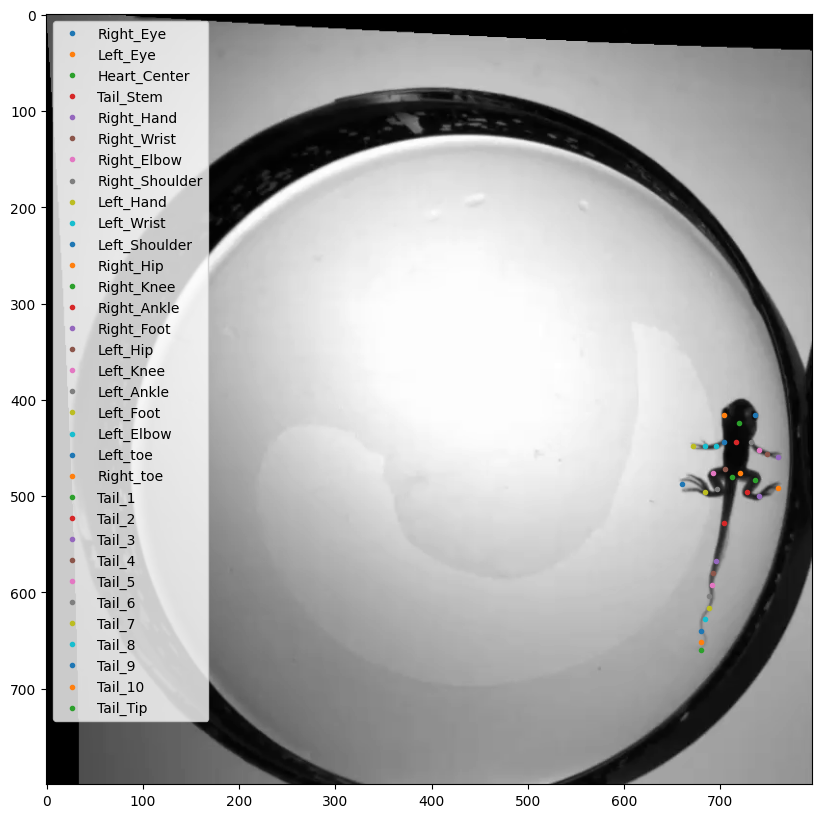

In [100]:
f, ax = plt.subplots(figsize=(10, 10))
ax.imshow(tad.image(frame=0), "gray")
for pi, p in enumerate(tad.bodyparts):
    ax.plot(*locs[0, pi].T, ".", alpha=1, label=p)
ax.legend();

### Extract simple features

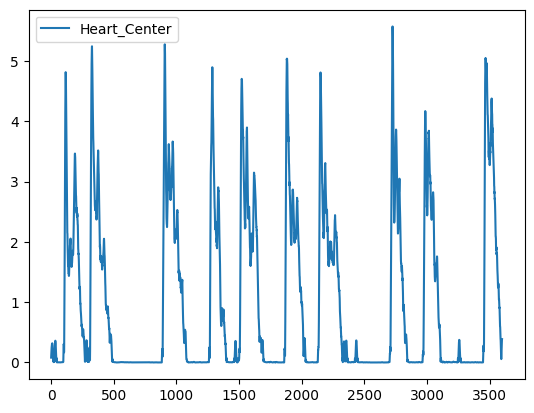

In [101]:
# get heart speed (not ego-centric) for first minute
heart_speed_df = tadpose.analysis.speeds(tad, parts=("Heart_Center",))

# plot it
heart_speed_df[:3600].plot();

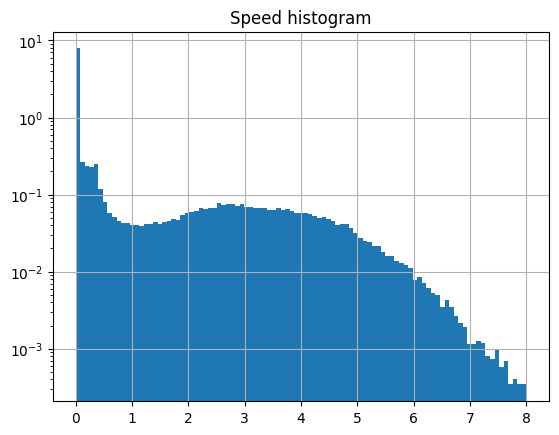

In [102]:
# plot heart speed distribution / useful for finding threshold
heart_speed_df.hist(bins=np.linspace(0, 8, 100), density=True, log=True)
plt.title("Speed histogram");

### Ego-centric speed for tail parts of first 10 secs

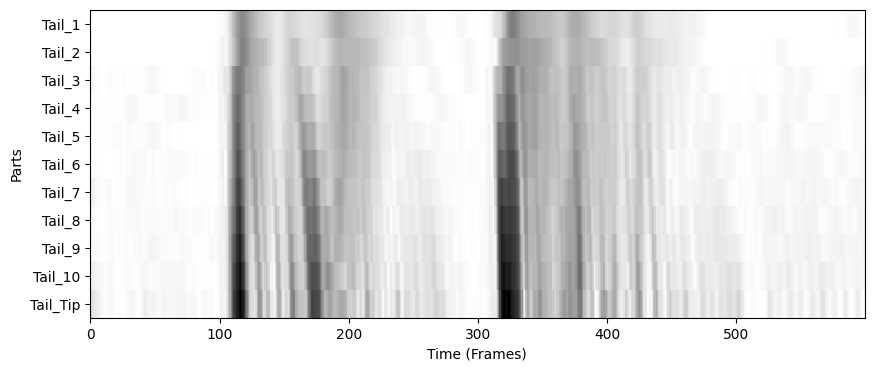

In [103]:
parts_for_speed = [
    "Tail_1",
    "Tail_2",
    "Tail_3",
    "Tail_4",
    "Tail_5",
    "Tail_6",
    "Tail_7",
    "Tail_8",
    "Tail_9",
    "Tail_10",
    "Tail_Tip",
]

speeds = tadpose.analysis.speeds(tad, parts_for_speed)[: 60* 10]

# plot them as heatmap
f, ax = plt.subplots(figsize=(10, 4))
im = ax.imshow(
    speeds.T,
    aspect="auto",
    interpolation="nearest",
    cmap="gray_r",
)
ax.set_xlabel("Time (Frames)")
ax.set_ylabel("Parts")
ax.set_yticks(np.arange(len(parts_for_speed)))
ax.set_yticklabels(parts_for_speed);

### Overlay ego-centric tail points

<Axes: >

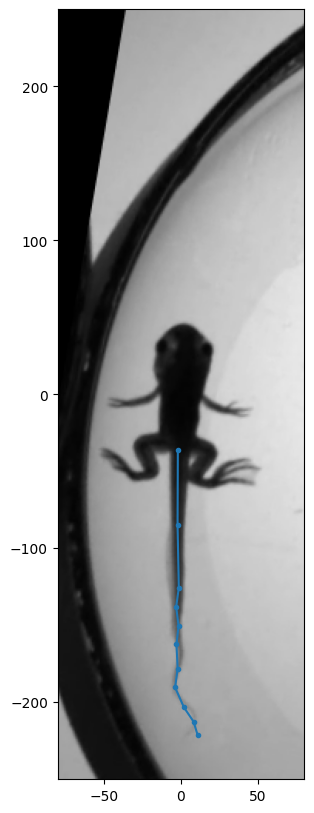

In [104]:
f, ax = plt.subplots(figsize=(7, 10))
tad.ego_plot(frame=42, parts=parts_for_speed, dest_height=500, ax=ax)